In [40]:
%matplotlib inline
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from preprocessing import *

# to autoreload modules on code change
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


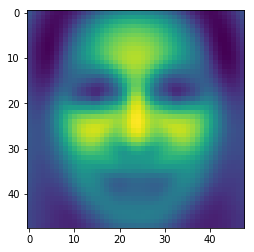

In [55]:
X_train, y_train, X_val, y_val, X_test, y_test = get_emotion_data(scale=True)

In [96]:
def convert_shape(dfs): # convert images into 4d from 2d and viceversa
    ret_dfs = [0]*len(dfs)
    for i,df in enumerate(dfs):
#         print(df.reshape(-1,48,48,1).shape)
        temp = np.zeros((df.shape[0],48,48,3))
#         print(temp.shape)
        df = df.reshape(-1,48,48)
#         print(temp[:,:,:,0].shape)
        temp[:,:,:,0] = df
        temp[:,:,:,1] = df
        temp[:,:,:,2] = df
        print(temp.shape)
        ret_dfs[i] = temp
    return ret_dfs

In [93]:
for j,i in enumerate([X_train, y_train, X_val, y_val, X_test, y_test]):
    print(i.shape)
    if j%2 != 0:
        print('----------------------------------------')
        bc = np.bincount(i.astype(int).reshape(-1))
        sm = bc.sum()
        print(bc/sm) # to check if sampling is stratified
        print()

(28709, 2304)
(28709, 1)
----------------------------------------
[ 0.13915497  0.01518688  0.14270786  0.25131492  0.16823992  0.11045317
  0.17294228]

(3589, 2304)
(3589, 1)
----------------------------------------
[ 0.13011981  0.01560323  0.13820006  0.24937308  0.18194483  0.1156311
  0.16912789]

(3589, 2304)
(3589, 1)
----------------------------------------
[ 0.13680691  0.0153246   0.14711619  0.24491502  0.16550571  0.11590972
  0.17442184]



In [129]:
datagen = ImageDataGenerator(
#         featurewise_center=True,
#         featurewise_std_normalization=True,
#         rotation_range=40,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest'
)

# datagen.fit(X_train.reshape(-1,48,48,1))

In [130]:
# X_train,X_val,X_test = convert_shape([X_train,X_val,X_test])

In [168]:
dl = datagen.flow(X_train, y_train, batch_size=1,shuffle=False,seed=1)

In [146]:
X_train.shape[]

(28709, 48, 48, 3)

In [184]:
len(iter(dl))
# print(a.shape)
# plt.imshow(a[0,:,:,2])

28709

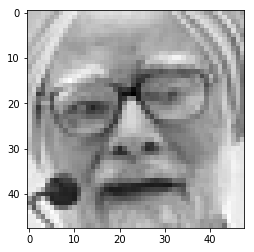

In [178]:
img = X_train[1].reshape(48,48,3)
img = cv2.resize(img,(250,250))
plt.imshow(X_train[1,:,:,2],cmap='gray')


In [61]:
img

array([[ 0.1204178 ,  0.1204178 ,  0.1204178 , ...,  0.00373634,
         0.00373634,  0.00373634],
       [ 0.1204178 ,  0.1204178 ,  0.1204178 , ...,  0.00373634,
         0.00373634,  0.00373634],
       [ 0.1204178 ,  0.1204178 ,  0.1204178 , ...,  0.00373634,
         0.00373634,  0.00373634],
       ..., 
       [ 0.26884607,  0.26884607,  0.26884607, ...,  0.27325297,
         0.27325297,  0.27325297],
       [ 0.26884607,  0.26884607,  0.26884607, ...,  0.27325297,
         0.27325297,  0.27325297],
       [ 0.26884607,  0.26884607,  0.26884607, ...,  0.27325297,
         0.27325297,  0.27325297]])